#Import numpy and Pandas

In [116]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import os
os.getcwd()


'C:\\Users\\Bala Piramanayagam\\OneDrive\\Desktop\\Anaconda\\DataScience'

#Input Datasets path

train_data = pd.read_csv(r'C:\Users\Bala Piramanayagam\OneDrive\Desktop\Anaconda\DataScience\train_data.csv')
test_data = pd.read_csv(r'C:\Users\Bala Piramanayagam\OneDrive\Desktop\Anaconda\DataScience\test_data.csv')


### Data analysis of both train_data and test_data  - General data understanding

##### Head function in Pandas used to get first n rows. In the below we get the first 10 rows of the train_data

In [5]:
train_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [9]:
test_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


#### shape used to identify number of rows and columns. We can understand the volume of the data

In [6]:
train_data.shape

(550068, 12)

In [10]:
test_data.shape

(233599, 11)

####Info method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


###Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame 
or a series of numeric values. When this method is applied to a series of string, 
it returns a different output#

In [11]:
train_data.describe().all

<bound method NDFrame._add_numeric_operations.<locals>.all of             User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.

##To have statistical details as column for easy reference we can alter the describe function as below

In [23]:
train_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0


In [24]:
test_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,233599.0,NaN,NaN,NaN,1003029.356859,1726.504968,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0
Product_ID,233599,3491,P00265242,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,233599,2,M,175772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,233599,7,26-35,93428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,233599.0,NaN,NaN,NaN,8.085407,6.521146,0.0,2.0,7.0,14.0,20.0
City_Category,233599,3,B,98566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,233599,5,1,82604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,233599.0,NaN,NaN,NaN,0.41007,0.491847,0.0,0.0,0.0,1.0,1.0
Product_Category_1,233599.0,NaN,NaN,NaN,5.276542,3.73638,1.0,1.0,5.0,8.0,18.0
Product_Category_2,161255.0,NaN,NaN,NaN,9.849586,5.094943,2.0,5.0,9.0,15.0,18.0


##Duplicated returns the boolean value whether data contains duplicated values

In [29]:
train_data.duplicated().sum()

0

In [30]:
test_data.duplicated().sum()

0

In [39]:
##Just assingning the index to the variable to concat the two datasets to one

In [36]:
train_data['source'] = 'traind'

In [41]:
train_data['source']

0         traind
1         traind
2         traind
3         traind
4         traind
           ...  
550063    traind
550064    traind
550065    traind
550066    traind
550067    traind
Name: source, Length: 550068, dtype: object

In [43]:
test_data['source'] = 'testda'

In [44]:
test_data['source']

0         testda
1         testda
2         testda
3         testda
4         testda
           ...  
233594    testda
233595    testda
233596    testda
233597    testda
233598    testda
Name: source, Length: 233599, dtype: object

##Concat the train data and test data into single dataset. We can call it as total

In [45]:
total = pd.concat([train_data,test_data])

In [46]:
total

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,traind
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,traind
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,traind
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,traind
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,traind
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,testda
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,testda
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,testda
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,testda


In [48]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  source                      783667 non-null  object 
dtypes: float64(3),

In [49]:
total.shape

(783667, 13)

##The above Steps Help ourselves to understand about the data. Now we have a data frame. So Preprocessing Starts

### PREPROCESSING

##Steps Involved in Data Preprocessing: 1 Data Cleaning: The data can have many irrelevant and missing parts. To handle this part, data cleaning is done.2 Data Transformation: This step is taken in order to transform the data in appropriate forms suitable for mining process. 3 Data Reduction:


In [53]:
total.count()

User_ID                       783667
Product_ID                    783667
Gender                        783667
Age                           783667
Occupation                    783667
City_Category                 783667
Stay_In_Current_City_Years    783667
Marital_Status                783667
Product_Category_1            783667
Product_Category_2            537685
Product_Category_3            237858
Purchase                      550068
source                        783667
dtype: int64

In [54]:
total.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase  source
1000001  P00000142   F       0-17   10          A              2                           0               3                   4.0                 5.0                 13650.0   traind    1
1004018  P00127442   F       46-50  20          C              2                           1               1                   2.0                 15.0                7723.0    traind    1
         P00032042   F       46-50  20          C              2                           1               1                   2.0                 15.0                12024.0   traind    1
         P00034042   F       46-50  20          C              2                           1               1                   2.0                 16.0                15653.0   traind    1
         P00034442   F       46-50  20          C           

#### Process on Categorical data to Convert categorical variable into dummy/indicator variables.


####In the below preprocessing dataframe we are not including User_Id, Product_id, Purchase, source from the total dataframe

In [57]:
total_pp = pd.get_dummies(total,columns=['Gender','Age','City_Category','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3','Occupation'])


In [58]:
total_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 95 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        783667 non-null  int64  
 1   Product_ID                     783667 non-null  object 
 2   Marital_Status                 783667 non-null  int64  
 3   Purchase                       550068 non-null  float64
 4   source                         783667 non-null  object 
 5   Gender_F                       783667 non-null  uint8  
 6   Gender_M                       783667 non-null  uint8  
 7   Age_0-17                       783667 non-null  uint8  
 8   Age_18-25                      783667 non-null  uint8  
 9   Age_26-35                      783667 non-null  uint8  
 10  Age_36-45                      783667 non-null  uint8  
 11  Age_46-50                      783667 non-null  uint8  
 12  Age_51-55                     

In [65]:
total_pp['Occupation_0'].value_counts().head()

0    684817
1     98850
Name: Occupation_0, dtype: int64

In [66]:
total_pp['City_Category_A'].value_counts().head()

0    573423
1    210244
Name: City_Category_A, dtype: int64

In [68]:
total_pp['Gender_F'].value_counts().head()

0    590031
1    193636
Name: Gender_F, dtype: int64

## Label Encoding:-

#### The most fundamental steps in the categorical encoding of data values is Label encoding. 
Label Encoder performs the conversion of the labels(entities (here our total_pp) of categorical data into a numeric format.



In [70]:
from sklearn.preprocessing import LabelEncoder

In [72]:
total_le = LabelEncoder()

In [73]:
total_le

LabelEncoder()

In [74]:
total_pp['Product_num']=total_le.fit_transform(total_pp['Product_ID'])


In [77]:
total_pp[['Product_ID', 'Product_num']].head(10)

,Product_ID,Product_num
0,P00069042,684
1,P00248942,2406
2,P00087842,868
3,P00085442,844
4,P00285442,2769
5,P00193542,1857
6,P00184942,1771
7,P00346142,3364
8,P0097242,3649
9,P00274942,2665


In [78]:
total_pp.Product_num.value_counts()


2568    2709
251     2310
1036    2292
1050    2279
464     2084
        ... 
1781       1
972        1
740        1
803        1
2455       1
Name: Product_num, Length: 3677, dtype: int64

In [79]:
total_pp.shape

(783667, 96)

In [80]:
total_pp['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], dtype=object)

In [81]:
total_pp['Product_num'].unique()

array([ 684, 2406,  868, ...,  300,  742, 2455])

In [84]:
total_pp.shape

(783667, 96)

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
total_pp.head(10)

,User_ID,Product_ID,Marital_Status,Purchase,source,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,P00069042,0,8370.0,traind,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,P00248942,0,15200.0,traind,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,P00087842,0,1422.0,traind,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,P00085442,0,1057.0,traind,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,P00285442,0,7969.0,traind,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2769
5,1000003,P00193542,0,15227.0,traind,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1857
6,1000004,P00184942,1,19215.0,traind,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1771
7,1000004,P00346142,1,15854.0,traind,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3364
8,1000004,P0097242,1,15686.0,traind,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3649
9,1000005,P00274942,1,7871.0,traind,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,2665


In [96]:
total_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 96 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        783667 non-null  int64  
 1   Product_ID                     783667 non-null  object 
 2   Marital_Status                 783667 non-null  int64  
 3   Purchase                       550068 non-null  float64
 4   source                         783667 non-null  object 
 5   Gender_F                       783667 non-null  uint8  
 6   Gender_M                       783667 non-null  uint8  
 7   Age_0-17                       783667 non-null  uint8  
 8   Age_18-25                      783667 non-null  uint8  
 9   Age_26-35                      783667 non-null  uint8  
 10  Age_36-45                      783667 non-null  uint8  
 11  Age_46-50                      783667 non-null  uint8  
 12  Age_51-55                     

###### Analyze the above columns, We have Product_ID, Purchase and Source as non-numeric data types. Now we are going to split the data as train preprocessed data (train_pp) dropping the source column and test preprocessed data(test_pp) by dropping purchase, source columns from total preprocessed data(total_pp).

In [97]:
train_pp = total_pp[total_pp['source']=='traind'].drop(columns='source')


In [98]:
test_pp = total_pp[total_pp['source']=='testda'].drop(columns=['source','Purchase'])

In [99]:
train_pp

,User_ID,Product_ID,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,P00069042,0,8370.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,P00248942,0,15200.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,P00087842,0,1422.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,P00085442,0,1057.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,P00285442,0,7969.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,368.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3612
550064,1006035,P00375436,0,371.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3613
550065,1006036,P00375436,1,137.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3613
550066,1006038,P00375436,0,365.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3613


In [100]:
test_pp

,User_ID,Product_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000004,P00128942,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1216
1,1000009,P00113442,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1063
2,1000010,P00288442,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2799
3,1000010,P00145342,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1379
4,1000011,P00053842,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1118
233595,1006036,P00254642,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2463
233596,1006036,P00031842,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,315
233597,1006037,P00124742,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1175


###We have train preprocessed data as train_pp and test preprocessed data as test_pp. Now we can identify the values of x and y

In [165]:
train_data_pp = train_pp

In [166]:
train_data_pp.to_csv("train_data_pp.csv",index=False)

In [163]:
test_data_pp = test_pp

In [164]:
test_data_pp.to_csv("test_data_pp.csv", index = False)


### As per the problem statement provided we need to create a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
Here I am taking Purchase from train preproccessed data(train_pp.Purchase) as y  and the rest of the identified criterias of the products from train preprocessed data (dropping Purchase and Product_id) as x

### Identifying x, test_x, y, test_y, predict_y, test_predict_y

In [101]:
x = train_pp.drop(columns = ['Purchase', 'Product_ID'])

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 93 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        550068 non-null  int64
 1   Marital_Status                 550068 non-null  int64
 2   Gender_F                       550068 non-null  uint8
 3   Gender_M                       550068 non-null  uint8
 4   Age_0-17                       550068 non-null  uint8
 5   Age_18-25                      550068 non-null  uint8
 6   Age_26-35                      550068 non-null  uint8
 7   Age_36-45                      550068 non-null  uint8
 8   Age_46-50                      550068 non-null  uint8
 9   Age_51-55                      550068 non-null  uint8
 10  Age_55+                        550068 non-null  uint8
 11  City_Category_A                550068 non-null  uint8
 12  City_Category_B                550068 non-null  uint8
 13 

In [103]:
y=train_pp.Purchase

In [106]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [107]:
test_x = test_pp.drop(columns = ['Product_ID'])

In [108]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 0 to 233598
Data columns (total 93 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   User_ID                        233599 non-null  int64
 1   Marital_Status                 233599 non-null  int64
 2   Gender_F                       233599 non-null  uint8
 3   Gender_M                       233599 non-null  uint8
 4   Age_0-17                       233599 non-null  uint8
 5   Age_18-25                      233599 non-null  uint8
 6   Age_26-35                      233599 non-null  uint8
 7   Age_36-45                      233599 non-null  uint8
 8   Age_46-50                      233599 non-null  uint8
 9   Age_51-55                      233599 non-null  uint8
 10  Age_55+                        233599 non-null  uint8
 11  City_Category_A                233599 non-null  uint8
 12  City_Category_B                233599 non-null  uint8
 13 

In [109]:
x.shape

(550068, 93)

In [110]:
test_x.shape

(233599, 93)

In [111]:
y.shape

(550068,)

In [112]:
x.head()

,User_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2769


In [113]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [117]:
test_x.head()

,User_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000004,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1216
1,1000009,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1063
2,1000010,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2799
3,1000010,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1379
4,1000011,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,535


##Linear Regression is a method used to fit the best straight line between a set of data points

In [118]:
model = LinearRegression()

In [119]:
model.fit(x,y)

LinearRegression()

##The coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable i.e. R2 = SSR/SST (Sum of Squares explained by Regression/total sum of squares)

In [120]:
model.coef_

array([ 7.51506226e-03, -5.33838390e+01,  3.08755867e+11,  3.08755867e+11,
       -7.32559947e+11, -7.32559947e+11, -7.32559947e+11, -7.32559946e+11,
       -7.32559946e+11, -7.32559946e+11, -7.32559946e+11, -7.66388663e+10,
       -7.66388662e+10, -7.66388658e+10, -8.27294889e+09, -8.27294889e+09,
       -8.27294885e+09, -8.27294889e+09, -8.27294887e+09, -4.21577038e+08,
       -4.21578772e+08, -4.21579237e+08, -4.21587995e+08, -4.21584332e+08,
       -4.21575008e+08, -4.21574171e+08, -4.21583098e+08, -4.21574870e+08,
       -4.21570921e+08, -4.21585765e+08, -4.21589161e+08, -4.21589866e+08,
       -4.21577468e+08, -4.21575881e+08, -4.21575691e+08, -4.21580397e+08,
       -4.21587602e+08, -4.21590335e+08, -4.21589982e+08,  3.95593948e+01,
        1.58682179e+03, -1.64304114e+03, -6.27652992e+02,  1.22565928e+02,
        7.42322990e+02,  3.46773026e+02, -8.79867783e+01,  1.58469165e+03,
       -2.30656883e+02, -4.04097747e+02, -8.00531311e+01, -2.05836235e+02,
       -1.58102997e+02,  

###Intercept is the point where the function crosses the y-axis

In [121]:
model.intercept_

512464239877.59326

In [122]:
y_pred=model.predict(x)

In [123]:
y_pred

array([11239.60339355, 13318.11889648,  1285.81286621, ...,
         414.15075684,   737.26184082,   192.84356689])

In [124]:
x

,User_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,684
1,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2406
2,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,868
3,1000001,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,844
4,1000002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,3612
550064,1006035,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3613
550065,1006036,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3613
550066,1006038,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3613


In [125]:
test_x

,User_ID,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Product_num
0,1000004,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1216
1,1000009,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1063
2,1000010,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2799
3,1000010,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1379
4,1000011,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1118
233595,1006036,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2463
233596,1006036,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,315
233597,1006037,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1175


In [160]:
test_y_pred = model.predict(test_x)

In [161]:
test_y_pred

array([13338.74309361, 11123.54860539,  5662.65277525, ...,
       13567.29964354, 20076.57562542,  1641.16277258])

In [128]:
train_x_pred = model.predict(x)
test_x_pred = model.predict(test_x)


In [162]:
mse = mean_squared_error(y, y_pred)
 


In [131]:
mse

8858485.170727745

In [132]:
rmse = np.sqrt(mean_squared_error(y, y_pred))

In [152]:
rmse

2976.3207439265925

In [153]:
r2_score = model.score(x,y)

In [154]:
test_pred_modified = np.where(test_y_pred<0,0,test_y_pred)


In [156]:
test_pp['Purchase'] = test_pred_modified


In [157]:
Output = test_pp[[ "User_ID", "Product_ID","Purchase"]]


In [158]:
Output

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13338.750671
1,1000009,P00113442,11123.573303
2,1000010,P00288442,5662.719849
3,1000010,P00145342,2353.209900
4,1000011,P00053842,2555.585205
...,...,...,...
233594,1006036,P00118942,7712.514771
233595,1006036,P00254642,6601.593445
233596,1006036,P00031842,13567.642822
233597,1006037,P00124742,20076.631775


In [159]:
Output.to_csv("Result_BlackFridaySales_trainData.csv", index = False)


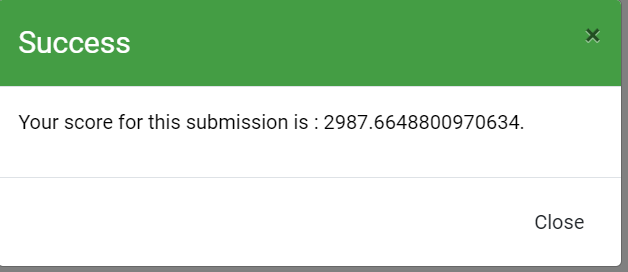